In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# __Apply Several Preprocessing Method to Modeling at once Part 1b : Tree__

__Table of Content__


1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [2]:
#Import Library

from sklearn.tree import DecisionTreeRegressor, plot_tree

> __1. DATA__

In [3]:
#Load dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


preprocess v2:
1. one hot encoding : sex, smoker
1. ordinal encoding : time, day
1. no treatment : size, total_bill

> __2. PREPROCESSING__

preprocess v1 scheme:
1. one hot encoding : sex, smoker, time
1. ordinal encoding : day
1. no treatment : size, total_bill

In [4]:
#1. Membuat ordinal mapping dan encoding

#a. membuat ordinal mapping terlebih dahulu
ordinal_mapping = [
    {'col': 'day',
    'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}},
]
#kalo nambah kolom bisa, jadi lgsg bikin beberapa

#b. membuat objek dan encoding
ordinal_encoder = ce.OrdinalEncoder(cols='day', mapping=ordinal_mapping)

In [5]:
#2. Membuat transformer encoding keseluruhan

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
    ('ordinal', ordinal_encoder, ['day']),
], remainder = 'passthrough')

#passthrough = kolom yg tidak dituliskan, akan dilewatkan ( defaultnya drop)

> __3. DATA SPLITTING__

In [6]:
#1. Menentukan variabel dependen dan independen

X = tips.drop('tip', axis=1)
y = tips['tip']


In [7]:
#2. Melakukan data splitting

Xtr, Xts, ytr, yts = train_test_split(X, y, random_state=10)

> __4. DATA TRANSFORM__

In [8]:
#Mengecek data xtrain

Xtr.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [9]:
#1. Melakukan data transform hasil encoding

Xtr_p = transformer.fit_transform(Xtr)
Xts_p = transformer.transform(Xts)

In [10]:
#2. Mengubah array 2D menjadi Dataframe

Xtr_p = pd.DataFrame(Xtr_p)
Xts_p = pd.DataFrame(Xts_p)

In [11]:
#Untuk mengecek list method yg telah dibuat

transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('ordinal',
  OrdinalEncoder(cols=['day'],
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}}]),
  ['day']),
 ('remainder', 'passthrough', [0, 5])]

In [12]:
Xtr.columns

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
#Mengecek feature name di method (0) 

transformer.transformers_[0]

('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time'])

In [14]:
#Mengecek isi dari feature name di method (0) 

transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [15]:
#Mengecek isi dari feature name di method (1) 

transformer.transformers_[1][1].get_feature_names()

['day']

In [16]:
#3. Membuat feature baru setelah di model

new_features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill', 'size']
new_features

['x0_Male', 'x1_Yes', 'x2_Lunch', 'day', 'total_bill', 'size']

In [17]:
#Feature awal sebelum dimodelling

features = X.columns
features

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [18]:
#4. Dijadikan menjadi dataframe

Xtr_p.columns = new_features
Xts_p.columns = new_features

display(Xtr_p.head())
display(Xts_p.head())

,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0


,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,0.0,0.0,0.0,4.0,16.21,3.0
1,1.0,1.0,0.0,3.0,20.29,2.0
2,1.0,1.0,0.0,3.0,13.81,2.0
3,1.0,1.0,0.0,3.0,18.29,4.0
4,1.0,1.0,0.0,3.0,15.01,2.0


> __5. MODEL FITTING & EVALUATION__

In [19]:
#1. Melakukan model fitting

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(Xtr_p, ytr)

DecisionTreeRegressor(max_depth=3)

In [20]:
#2. Melakukan prediksi

y_pred = dtr.predict(Xts_p)

In [21]:
#3. Melakukan model performance dgn mse dan rmse

print('mse:', mean_squared_error(yts, y_pred))
print('rmse:', np.sqrt(mean_squared_error(yts, y_pred)))

mse: 0.8414314225960591
rmse: 0.9172957116415944


> __6. MODEL PROPERTIES__

In [22]:
#1. Membuat importance tabel untuk dtc

importance_table = pd.DataFrame({
    'importance': dtr.feature_importances_
}, index=new_features)

importance_table

,importance
x0_Male,0.000000
x1_Yes,0.108978
x2_Lunch,0.000000
day,0.000000
total_bill,0.888692
size,0.002329


<AxesSubplot:>

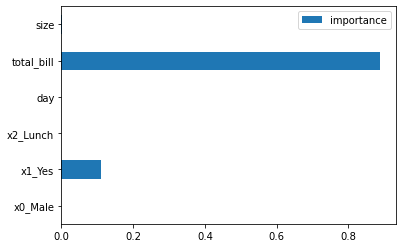

In [23]:
#2. Membuat plot dari hasil importance diatas

importance_table.plot(kind='barh')

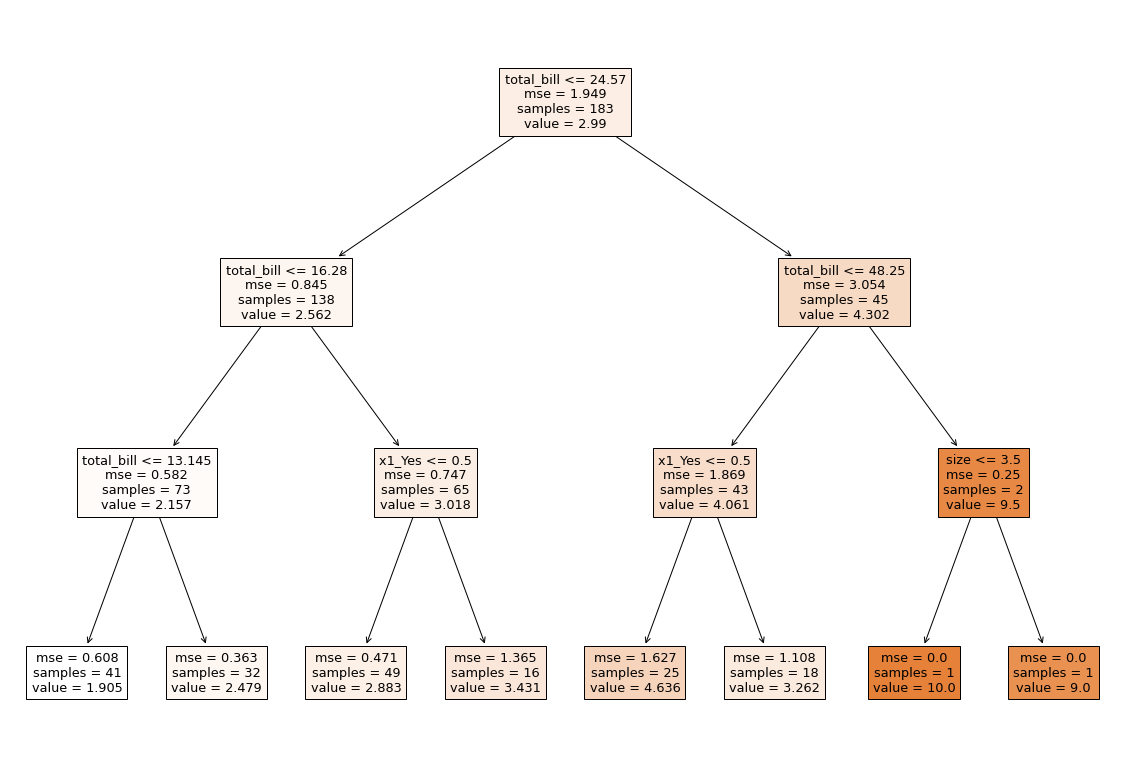

In [24]:
#3. Membuat plot tree

plt.figure(figsize=(20,14))
plot_tree(dtr, feature_names = new_features, filled=True)
plt.show()

Notes:
- value : rata2 dari sample
- jumlah sample di root == jumlah sample di kedua foot